In [ ]:
!pip install pregress

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import pregress as pr
import matplotlib.pyplot as plt

In [ ]:
df = 'transit_data.xlsx'
stop_times = pd.read_excel(df, sheet_name='stop_times')
trips = pd.read_excel(df, sheet_name='trips')
routes = pd.read_excel(df, sheet_name='routes')
calendar = pd.read_excel(df, sheet_name='calendar')

In [ ]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint
0,4828771,05:32:00,05:32:00,795,1,NaN,0,0,NaN,1
1,4828771,05:33:00,05:33:00,796,2,NaN,0,0,0.5206,1
2,4828771,05:34:00,05:34:00,797,3,NaN,0,0,1.1206,1
3,4828771,05:35:00,05:35:00,798,4,NaN,0,0,1.4817,1
4,4828771,05:36:00,05:36:00,799,5,NaN,0,0,1.7449,1


**Top 10 routes by number of trips**

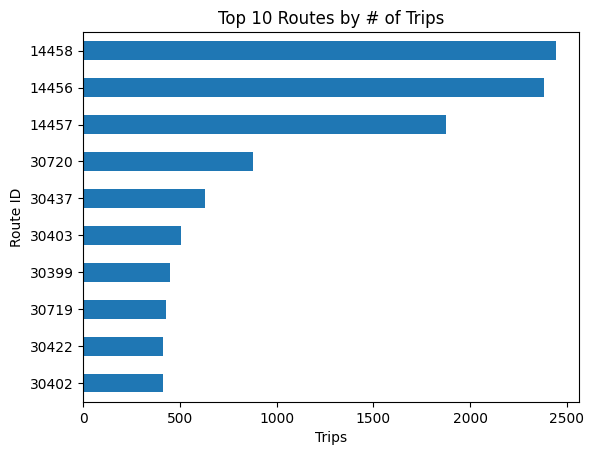

In [ ]:
top10 = trips["route_id"].value_counts().head(10)
top10.sort_values().plot(kind="barh")

plt.title("Top 10 Routes by # of Trips")
plt.ylabel("Route ID")
plt.xlabel("Trips")
plt.show()

**Stops per Trip**

In [ ]:
stops_per_trip = stop_times.groupby("trip_id").size()

print(stops_per_trip.head())
print("Mean:", stops_per_trip.mean())
print("Median:", stops_per_trip.median())
print("Min:", stops_per_trip.min())
print("Max:", stops_per_trip.max())
print("90th percentile:", stops_per_trip.quantile(0.90))

trip_id
4745075    29
4745076    29
4745077    29
4745078    29
4745079    29
dtype: int64
Mean: 38.46051612377186
Median: 28.0
Min: 2
Max: 143
90th percentile: 84.0


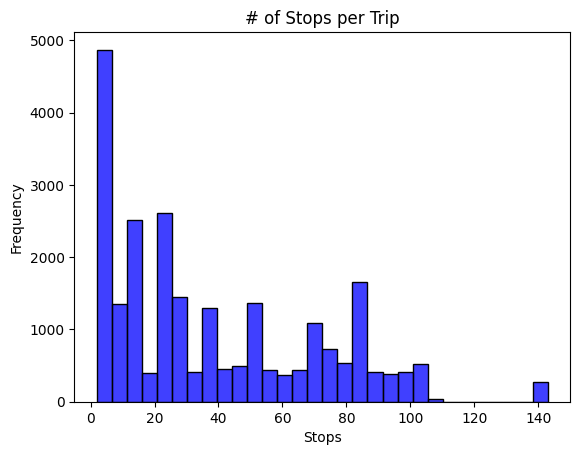

In [ ]:
pr.hist(stops_per_trip, xlab = "Stops", ylab = "Frequency", title = "# of Stops per Trip")

route_type
0      3
2      1
3    125
dtype: int64
Mean: 43.0
Median: 3.0
Min: 1
Max: 125
90th percentile: 100.60000000000001


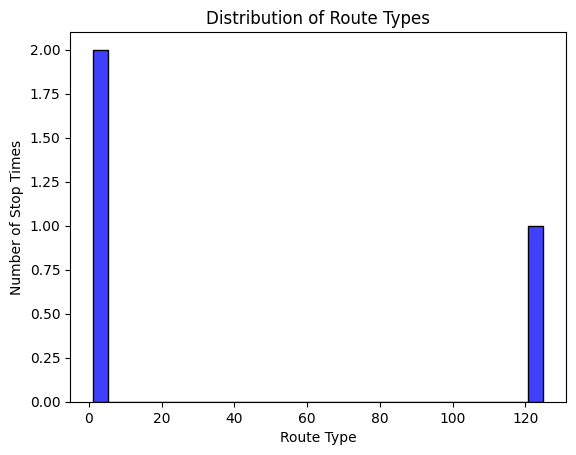

In [ ]:
routes = pd.read_excel(df, sheet_name='routes')
route_type_dist= routes.groupby("route_type").size()

print(route_type_dist.head())
print("Mean:", route_type_dist.mean())
print("Median:", route_type_dist.median())
print("Min:", route_type_dist.min())
print("Max:", route_type_dist.max())
print("90th percentile:", route_type_dist.quantile(0.90))


pr.hist(route_type_dist, xlab="Route Type", ylab="Number of Stop Times", title="Distribution of Route Types")


=== Basic counts ===
     table   rows  unique_route_id  unique_trip_id  unique_service_id  unique_stop_id
    routes    129            129.0             NaN                NaN             NaN
     trips  24529            128.0         24529.0               12.0             NaN
  calendar     12              NaN             NaN               12.0             NaN
stop_times 943398              NaN         24529.0                NaN          6530.0

=== Missingness: routes (top 10) ===
                  missing  missing_%
agency_id             129     100.00
route_url             129     100.00
route_desc            129     100.00
route_text_color       77      59.69
route_id                0       0.00
route_long_name         0       0.00
route_short_name        0       0.00
route_type              0       0.00
route_color             0       0.00

=== Missingness: trips (top 10) ===
                       missing  missing_%
trip_short_name          24529      100.0
route_id           

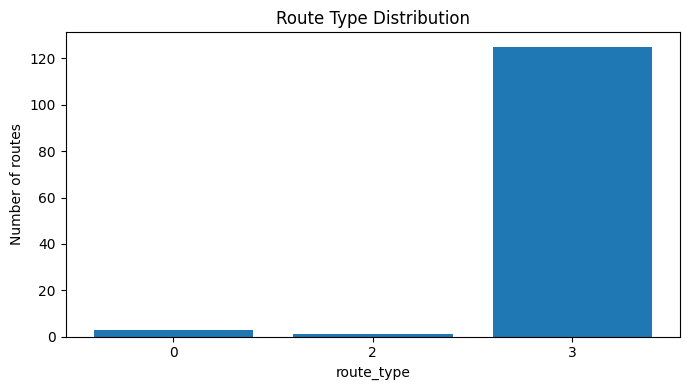


=== Top 10 routes by trips ===
 route_id  num_trips label
    30402        412     9
    30422        414    52
    30719        426    77
    30399        448     3
    30403        506    11
    30437        628   100
    30720        876  2600
    14457       1877   MMI
    14456       2384   MMO
    14458       2442   MIA


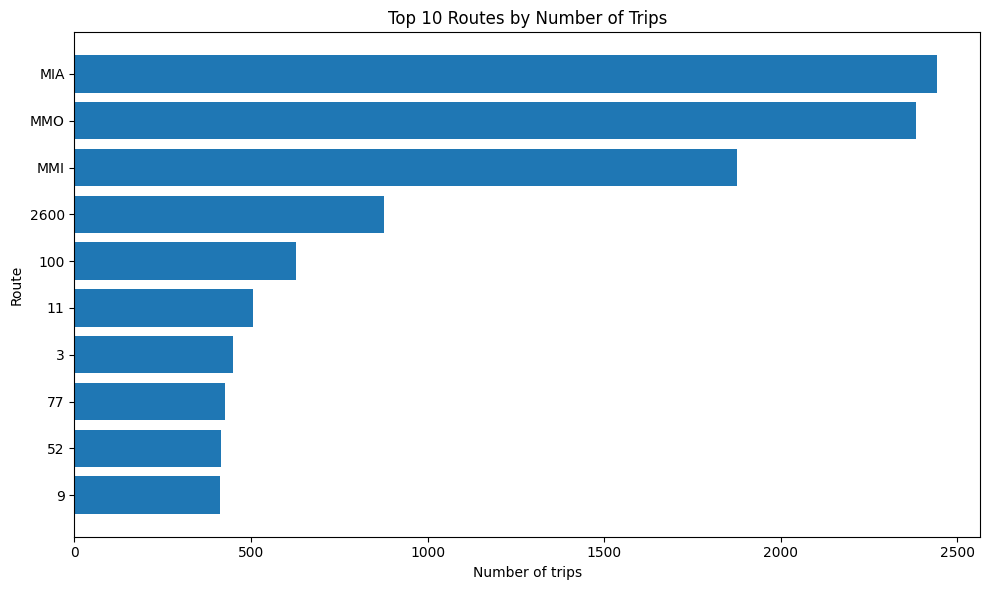


=== direction_id distribution ===
direction_id
0    12910
1    11619


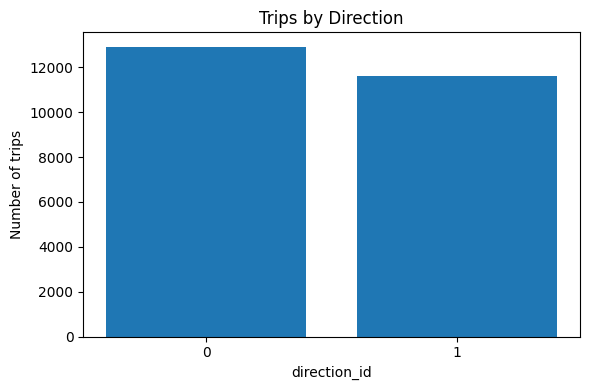


=== Calendar summary (first 12 rows) ===
 service_id  days_active_per_week start_date end_date  service_days_span
         19                     1        NaT      NaT                NaN
         18                     1        NaT      NaT                NaN
         21                     5        NaT      NaT                NaN
         13                     1        NaT      NaT                NaN
         11                     5        NaT      NaT                NaN
         12                     1        NaT      NaT                NaN
          8                     1        NaT      NaT                NaN
          7                     1        NaT      NaT                NaN
          6                     5        NaT      NaT                NaN
          3                     1        NaT      NaT                NaN
          1                     5        NaT      NaT                NaN
          2                     1        NaT      NaT                NaN


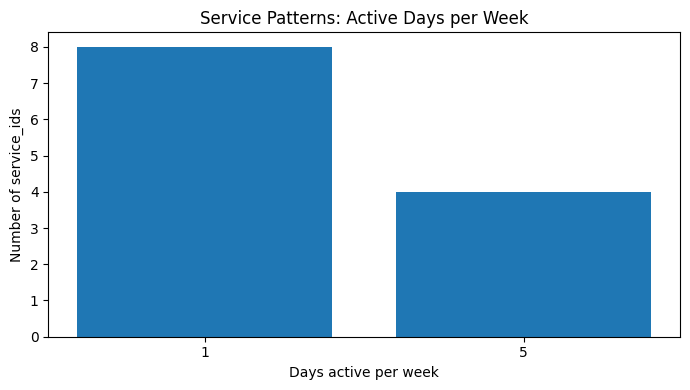


=== Stops per trip summary ===
Trips counted: 24529
Mean: 38.46
Median: 28.00
Min: 2
Max: 143
90th percentile: 84.00


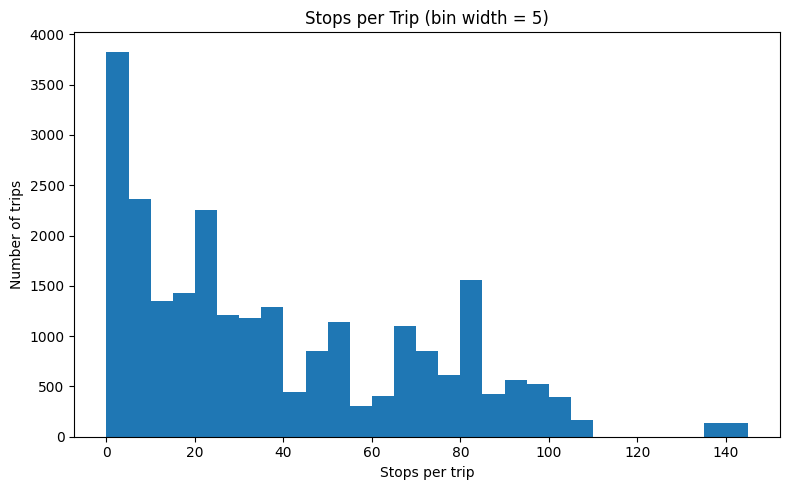


=== Trip duration (minutes) summary ===
Trips with duration computed: 23692
Mean: 45.58
Median: 42.00
Min: 0.00
Max: 164.00
90th percentile: 93.00


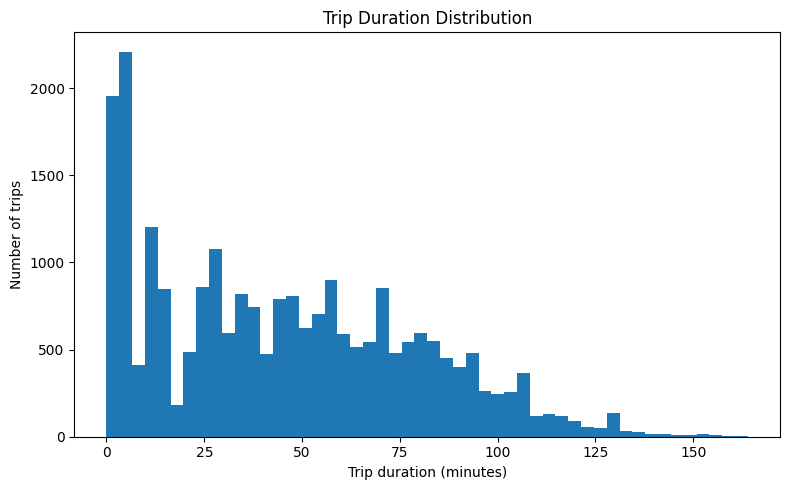


Saved: eda_basic_counts.csv, eda_top10_routes_by_trips.csv, eda_stops_per_trip.csv, eda_trip_duration_minutes.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

FILE = "transit_data.xlsx"

# -----------------------------
# Helpers
# -----------------------------
def parse_gtfs_time_to_seconds(s: pd.Series) -> pd.Series:
    """
    GTFS times can exceed 24:00:00 (e.g., 25:10:00). Convert to seconds.
    Returns float seconds (NaN if missing/invalid).
    """
    s = s.astype("string")
    parts = s.str.split(":", expand=True)
    if parts.shape[1] < 3:
        return pd.to_numeric(pd.Series([np.nan] * len(s)), errors="coerce")

    h = pd.to_numeric(parts[0], errors="coerce")
    m = pd.to_numeric(parts[1], errors="coerce")
    sec = pd.to_numeric(parts[2], errors="coerce")
    return h * 3600 + m * 60 + sec

def missing_table(df: pd.DataFrame) -> pd.DataFrame:
    miss = df.isna().sum()
    pct = (miss / len(df) * 100).round(2)
    out = pd.DataFrame({"missing": miss, "missing_%": pct}).sort_values("missing", ascending=False)
    return out

# -----------------------------
# Load sheets (use only needed columns where possible)
# -----------------------------
routes = pd.read_excel(FILE, sheet_name="routes", engine="openpyxl")
trips = pd.read_excel(FILE, sheet_name="trips", engine="openpyxl")
calendar = pd.read_excel(FILE, sheet_name="calendar", engine="openpyxl")

# stop_times is big; load only needed cols for core EDA
stop_times_cols = ["trip_id", "stop_id", "stop_sequence", "arrival_time", "departure_time"]
stop_times = pd.read_excel(FILE, sheet_name="stop_times", engine="openpyxl", usecols=stop_times_cols)

# -----------------------------
# 1) Basic counts table (most important)
# -----------------------------
counts = pd.DataFrame([
    {"table": "routes", "rows": len(routes),
     "unique_route_id": routes["route_id"].nunique() if "route_id" in routes else np.nan},
    {"table": "trips", "rows": len(trips),
     "unique_trip_id": trips["trip_id"].nunique() if "trip_id" in trips else np.nan,
     "unique_route_id": trips["route_id"].nunique() if "route_id" in trips else np.nan,
     "unique_service_id": trips["service_id"].nunique() if "service_id" in trips else np.nan},
    {"table": "calendar", "rows": len(calendar),
     "unique_service_id": calendar["service_id"].nunique() if "service_id" in calendar else np.nan},
    {"table": "stop_times", "rows": len(stop_times),
     "unique_trip_id": stop_times["trip_id"].nunique() if "trip_id" in stop_times else np.nan,
     "unique_stop_id": stop_times["stop_id"].nunique() if "stop_id" in stop_times else np.nan},
])
print("\n=== Basic counts ===")
print(counts.to_string(index=False))

# -----------------------------
# 2) Missingness (quick data quality)
# -----------------------------
print("\n=== Missingness: routes (top 10) ===")
print(missing_table(routes).head(10).to_string())

print("\n=== Missingness: trips (top 10) ===")
print(missing_table(trips).head(10).to_string())

print("\n=== Missingness: calendar ===")
print(missing_table(calendar).to_string())

print("\n=== Missingness: stop_times (top 10) ===")
print(missing_table(stop_times).head(10).to_string())

# -----------------------------
# 3) Route types distribution (routes)
# -----------------------------
if "route_type" in routes.columns:
    rt = routes["route_type"].value_counts().sort_index()
    print("\n=== route_type distribution ===")
    print(rt.to_string())

    plt.figure(figsize=(7, 4))
    plt.bar(rt.index.astype(str), rt.values)
    plt.title("Route Type Distribution")
    plt.xlabel("route_type")
    plt.ylabel("Number of routes")
    plt.tight_layout()
    plt.show()

# -----------------------------
# 4) Top 10 routes by number of trips (trips -> route_id)
# -----------------------------
top10 = trips["route_id"].value_counts().head(10).rename_axis("route_id").reset_index(name="num_trips")

# Optional: merge names if present
label = top10["route_id"].astype(str)
if "route_short_name" in routes.columns:
    tmp = routes[["route_id", "route_short_name"]].drop_duplicates()
    top10 = top10.merge(tmp, on="route_id", how="left")
    label = top10["route_short_name"].fillna(top10["route_id"].astype(str)).astype(str)
elif "route_long_name" in routes.columns:
    tmp = routes[["route_id", "route_long_name"]].drop_duplicates()
    top10 = top10.merge(tmp, on="route_id", how="left")
    label = top10["route_long_name"].fillna(top10["route_id"].astype(str)).astype(str)

plot_df = top10.copy()
plot_df["label"] = label
plot_df = plot_df.sort_values("num_trips", ascending=True)

print("\n=== Top 10 routes by trips ===")
print(plot_df[["route_id", "num_trips", "label"]].to_string(index=False))

plt.figure(figsize=(10, 6))
plt.barh(plot_df["label"], plot_df["num_trips"])
plt.title("Top 10 Routes by Number of Trips")
plt.xlabel("Number of trips")
plt.ylabel("Route")
plt.tight_layout()
plt.show()

# -----------------------------
# 5) Direction split (trips)
# -----------------------------
if "direction_id" in trips.columns:
    d = trips["direction_id"].value_counts().sort_index()
    print("\n=== direction_id distribution ===")
    print(d.to_string())

    plt.figure(figsize=(6, 4))
    plt.bar(d.index.astype(str), d.values)
    plt.title("Trips by Direction")
    plt.xlabel("direction_id")
    plt.ylabel("Number of trips")
    plt.tight_layout()
    plt.show()

# -----------------------------
# 6) Calendar service patterns (calendar)
# -----------------------------
day_cols = [c for c in ["monday","tuesday","wednesday","thursday","friday","saturday","sunday"] if c in calendar.columns]
if day_cols:
    cal = calendar.copy()
    cal["days_active_per_week"] = cal[day_cols].sum(axis=1)
    if "start_date" in cal.columns and "end_date" in cal.columns:
        cal["start_date"] = pd.to_datetime(cal["start_date"].astype(str), format="%Y%m%d", errors="coerce")
        cal["end_date"] = pd.to_datetime(cal["end_date"].astype(str), format="%Y%m%d", errors="coerce")
        cal["service_days_span"] = (cal["end_date"] - cal["start_date"]).dt.days

    print("\n=== Calendar summary (first 12 rows) ===")
    show_cols = ["service_id", "days_active_per_week"] + [c for c in ["start_date","end_date","service_days_span"] if c in cal.columns]
    print(cal[show_cols].to_string(index=False))

    plt.figure(figsize=(7, 4))
    vc = cal["days_active_per_week"].value_counts().sort_index()
    plt.bar(vc.index.astype(str), vc.values)
    plt.title("Service Patterns: Active Days per Week")
    plt.xlabel("Days active per week")
    plt.ylabel("Number of service_ids")
    plt.tight_layout()
    plt.show()

# -----------------------------
# 7) Stops per trip (stop_times)
# -----------------------------
stops_per_trip = stop_times.groupby("trip_id").size()
print("\n=== Stops per trip summary ===")
print(f"Trips counted: {len(stops_per_trip)}")
print(f"Mean: {stops_per_trip.mean():.2f}")
print(f"Median: {stops_per_trip.median():.2f}")
print(f"Min: {stops_per_trip.min()}")
print(f"Max: {stops_per_trip.max()}")
print(f"90th percentile: {stops_per_trip.quantile(0.90):.2f}")

plt.figure(figsize=(8, 5))
# Bin width of 5 usually looks much better than defaults
bins = range(0, int(stops_per_trip.max()) + 6, 5)
plt.hist(stops_per_trip, bins=bins)
plt.title("Stops per Trip (bin width = 5)")
plt.xlabel("Stops per trip")
plt.ylabel("Number of trips")
plt.tight_layout()
plt.show()

# -----------------------------
# 8) Trip duration (approx) from stop_times
#    duration = last departure - first arrival per trip
# -----------------------------
arr_sec = parse_gtfs_time_to_seconds(stop_times["arrival_time"])
dep_sec = parse_gtfs_time_to_seconds(stop_times["departure_time"])

tmp = stop_times[["trip_id", "stop_sequence"]].copy()
tmp["arr_sec"] = arr_sec
tmp["dep_sec"] = dep_sec

# first arrival: smallest stop_sequence; last departure: largest stop_sequence
tmp_sorted = tmp.sort_values(["trip_id", "stop_sequence"])
first_arr = tmp_sorted.groupby("trip_id")["arr_sec"].first()
last_dep = tmp_sorted.groupby("trip_id")["dep_sec"].last()

trip_duration_min = (last_dep - first_arr) / 60.0
trip_duration_min = trip_duration_min.replace([np.inf, -np.inf], np.nan).dropna()
trip_duration_min = trip_duration_min[trip_duration_min >= 0]  # filter obvious bad cases

print("\n=== Trip duration (minutes) summary ===")
print(f"Trips with duration computed: {len(trip_duration_min)}")
print(f"Mean: {trip_duration_min.mean():.2f}")
print(f"Median: {trip_duration_min.median():.2f}")
print(f"Min: {trip_duration_min.min():.2f}")
print(f"Max: {trip_duration_min.max():.2f}")
print(f"90th percentile: {trip_duration_min.quantile(0.90):.2f}")

plt.figure(figsize=(8, 5))
plt.hist(trip_duration_min, bins=50)
plt.title("Trip Duration Distribution")
plt.xlabel("Trip duration (minutes)")
plt.ylabel("Number of trips")
plt.tight_layout()
plt.show()

# -----------------------------
# Optional: export key tables
# -----------------------------
counts.to_csv("eda_basic_counts.csv", index=False)
top10.to_csv("eda_top10_routes_by_trips.csv", index=False)
stops_per_trip.rename("stops_per_trip").to_csv("eda_stops_per_trip.csv")
trip_duration_min.rename("trip_duration_minutes").to_csv("eda_trip_duration_minutes.csv")
print("\nSaved: eda_basic_counts.csv, eda_top10_routes_by_trips.csv, eda_stops_per_trip.csv, eda_trip_duration_minutes.csv")


Loading sheets...

=== Basic counts (new sheets) ===
         table   rows  unique_stop_id  unique_shape_id  unique_service_id
         stops   6530          6530.0              NaN                NaN
        shapes 108520             NaN            299.0                NaN
calendar_dates     10             NaN              NaN                4.0

=== Missingness: stops (top 15) ===
                     missing  missing_%
location_type           6530     100.00
parent_station          6530     100.00
zone_id                 6530     100.00
stop_url                6530     100.00
stop_timezone           6530     100.00
stop_desc               5970      91.42
stop_id                    0       0.00
stop_code                  0       0.00
stop_name                  0       0.00
stop_lon                   0       0.00
stop_lat                   0       0.00
wheelchair_boarding        0       0.00

=== Missingness: shapes (top 15) ===
                     missing  missing_%
shape_id        

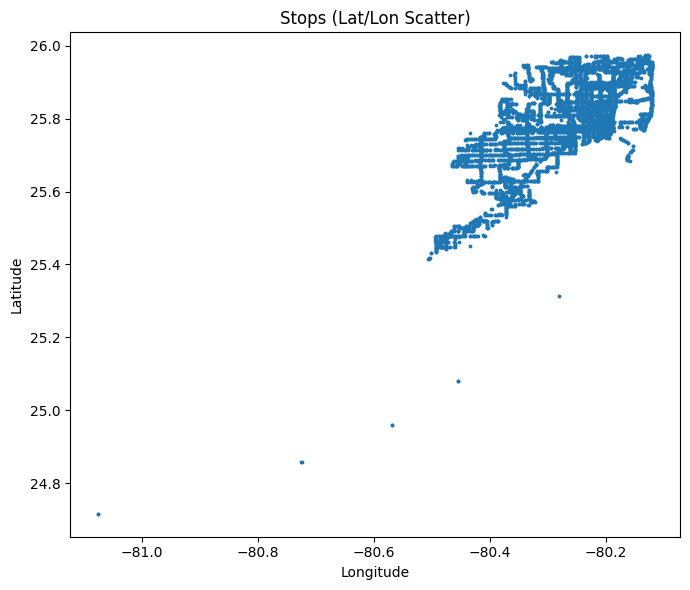


--- Parent/Child station structure ---
Stops with parent_station (children): 0
Unique parent_station ids referenced: 0

SHAPES EDA

--- Points per shape summary ---
Shapes counted: 299
Mean points: 362.94
Median points: 325.00
Min points: 40
Max points: 1472
90th percentile: 607.40


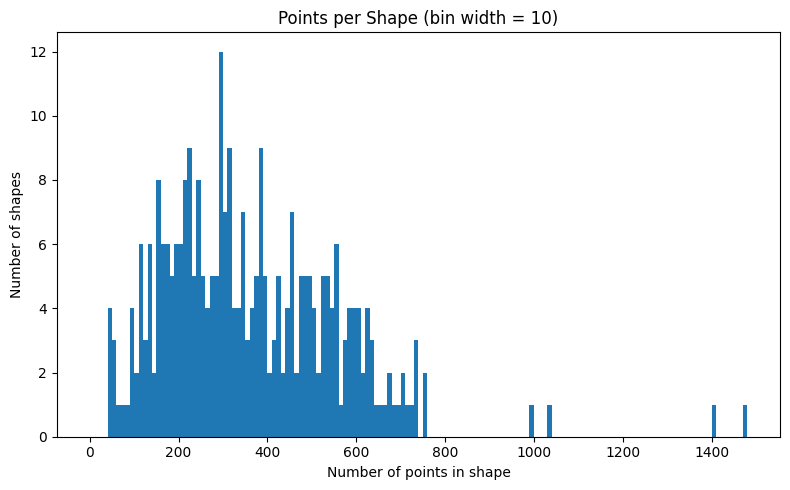

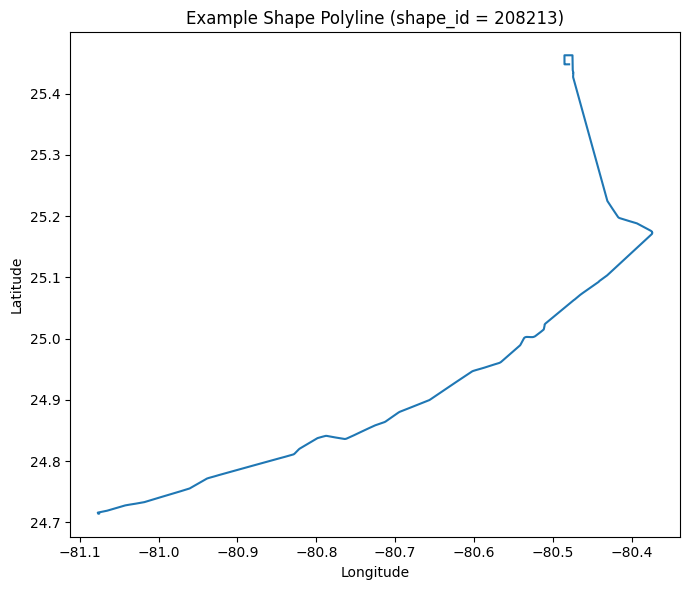


--- Shape length proxy (max shape_dist_traveled per shape) ---
Shapes with dist info: 299
Mean: 21.29
Median: 19.18
Min: 1.69
Max: 129.98
90th percentile: 33.94


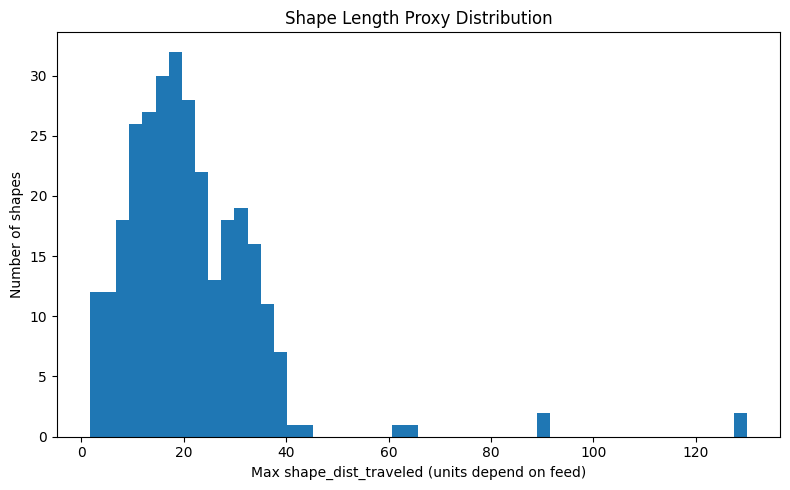


CALENDAR_DATES EDA

--- calendar_dates date coverage ---
Min date: NaT
Max date: NaT
Unique dates: 0

--- exception_type counts ---
exception_type
1    5
2    5


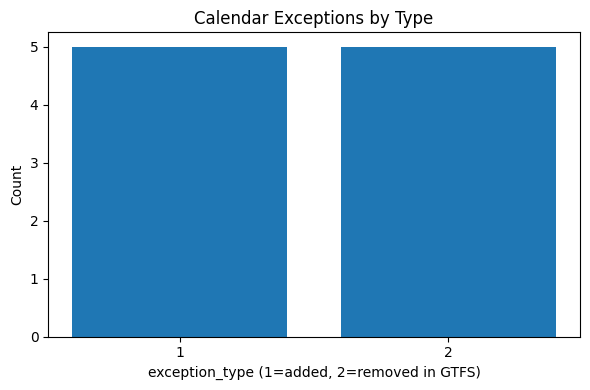


--- Top 10 service_ids by number of exceptions ---
service_id
6    3
8    3
1    2
3    2

Done.


In [ ]:
def missing_table(df: pd.DataFrame) -> pd.DataFrame:
    miss = df.isna().sum()
    pct = (miss / len(df) * 100).round(2)
    return (
        pd.DataFrame({"missing": miss, "missing_%": pct})
        .sort_values("missing", ascending=False)
    )

print("Loading sheets...")
stops = pd.read_excel(FILE, sheet_name="stops", engine="openpyxl")
shapes = pd.read_excel(FILE, sheet_name="shapes", engine="openpyxl")
calendar_dates = pd.read_excel(FILE, sheet_name="calendar_dates", engine="openpyxl")

# -----------------------------
# 0) Basic counts table (new sheets only)
# -----------------------------
counts_new = pd.DataFrame([
    {"table": "stops", "rows": len(stops),
     "unique_stop_id": stops["stop_id"].nunique() if "stop_id" in stops else np.nan},
    {"table": "shapes", "rows": len(shapes),
     "unique_shape_id": shapes["shape_id"].nunique() if "shape_id" in shapes else np.nan},
    {"table": "calendar_dates", "rows": len(calendar_dates),
     "unique_service_id": calendar_dates["service_id"].nunique() if "service_id" in calendar_dates else np.nan},
])

print("\n=== Basic counts (new sheets) ===")
print(counts_new.to_string(index=False))

# -----------------------------
# 1) Missingness (data quality)
# -----------------------------
print("\n=== Missingness: stops (top 15) ===")
print(missing_table(stops).head(15).to_string())

print("\n=== Missingness: shapes (top 15) ===")
print(missing_table(shapes).head(15).to_string())

print("\n=== Missingness: calendar_dates (top 15) ===")
print(missing_table(calendar_dates).head(15).to_string())

# =========================================================
# STOPS EDA (most useful: geographic + categorical breakdown)
# =========================================================
print("\n====================")
print("STOPS EDA")
print("====================")

# Basic categorical distributions if present
for col in ["location_type", "wheelchair_boarding", "zone_id"]:
    if col in stops.columns:
        vc = stops[col].value_counts(dropna=False).head(20)
        print(f"\n--- {col} value counts (top 20) ---")
        print(vc.to_string())

# Lat/lon sanity + bounding box + simple scatter (if present)
if "stop_lat" in stops.columns and "stop_lon" in stops.columns:
    lat = pd.to_numeric(stops["stop_lat"], errors="coerce")
    lon = pd.to_numeric(stops["stop_lon"], errors="coerce")
    valid_geo = lat.notna() & lon.notna()

    print("\n--- Stops with valid lat/lon ---")
    print(f"Valid geo rows: {int(valid_geo.sum())} / {len(stops)}")

    if valid_geo.any():
        print("\n--- Lat/Lon bounds ---")
        print(f"Lat min/max: {lat[valid_geo].min():.6f} / {lat[valid_geo].max():.6f}")
        print(f"Lon min/max: {lon[valid_geo].min():.6f} / {lon[valid_geo].max():.6f}")

        plt.figure(figsize=(7, 6))
        plt.scatter(lon[valid_geo], lat[valid_geo], s=3)
        plt.title("Stops (Lat/Lon Scatter)")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.tight_layout()
        plt.show()

# Parent/child stations (if parent_station exists)
if "parent_station" in stops.columns and "stop_id" in stops.columns:
    n_child = stops["parent_station"].notna().sum()
    print("\n--- Parent/Child station structure ---")
    print(f"Stops with parent_station (children): {int(n_child)}")
    print(f"Unique parent_station ids referenced: {stops['parent_station'].nunique(dropna=True)}")

# =========================================================
# SHAPES EDA (most useful: points per shape + distance coverage)
# =========================================================
print("\n====================")
print("SHAPES EDA")
print("====================")

required_shape_cols = {"shape_id", "shape_pt_lat", "shape_pt_lon", "shape_pt_sequence"}
if required_shape_cols.issubset(shapes.columns):
    pts_per_shape = shapes.groupby("shape_id").size()

    print("\n--- Points per shape summary ---")
    print(f"Shapes counted: {len(pts_per_shape)}")
    print(f"Mean points: {pts_per_shape.mean():.2f}")
    print(f"Median points: {pts_per_shape.median():.2f}")
    print(f"Min points: {pts_per_shape.min()}")
    print(f"Max points: {pts_per_shape.max()}")
    print(f"90th percentile: {pts_per_shape.quantile(0.90):.2f}")

    plt.figure(figsize=(8, 5))
    bins = range(0, int(pts_per_shape.max()) + 11, 10)
    plt.hist(pts_per_shape, bins=bins)
    plt.title("Points per Shape (bin width = 10)")
    plt.xlabel("Number of points in shape")
    plt.ylabel("Number of shapes")
    plt.tight_layout()
    plt.show()

    # Plot one example shape (the one with the most points)
    example_shape_id = pts_per_shape.idxmax()
    ex = shapes[shapes["shape_id"] == example_shape_id].copy()
    ex["shape_pt_sequence"] = pd.to_numeric(ex["shape_pt_sequence"], errors="coerce")
    ex = ex.sort_values("shape_pt_sequence")

    ex_lat = pd.to_numeric(ex["shape_pt_lat"], errors="coerce")
    ex_lon = pd.to_numeric(ex["shape_pt_lon"], errors="coerce")
    ok = ex_lat.notna() & ex_lon.notna()

    if ok.any():
        plt.figure(figsize=(7, 6))
        plt.plot(ex_lon[ok], ex_lat[ok])
        plt.title(f"Example Shape Polyline (shape_id = {example_shape_id})")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.tight_layout()
        plt.show()

# If shape_dist_traveled exists, summarize how long shapes are (approx)
if "shape_dist_traveled" in shapes.columns and "shape_id" in shapes.columns:
    dist = pd.to_numeric(shapes["shape_dist_traveled"], errors="coerce")
    # max dist per shape is a common proxy for total shape length
    shape_length = shapes.assign(_dist=dist).groupby("shape_id")["_dist"].max()

    shape_length = shape_length.dropna()
    if len(shape_length) > 0:
        print("\n--- Shape length proxy (max shape_dist_traveled per shape) ---")
        print(f"Shapes with dist info: {len(shape_length)}")
        print(f"Mean: {shape_length.mean():.2f}")
        print(f"Median: {shape_length.median():.2f}")
        print(f"Min: {shape_length.min():.2f}")
        print(f"Max: {shape_length.max():.2f}")
        print(f"90th percentile: {shape_length.quantile(0.90):.2f}")

        plt.figure(figsize=(8, 5))
        plt.hist(shape_length, bins=50)
        plt.title("Shape Length Proxy Distribution")
        plt.xlabel("Max shape_dist_traveled (units depend on feed)")
        plt.ylabel("Number of shapes")
        plt.tight_layout()
        plt.show()

# =========================================================
# CALENDAR_DATES EDA (most useful: exceptions by type + date range)
# =========================================================
print("\n====================")
print("CALENDAR_DATES EDA")
print("====================")

if "date" in calendar_dates.columns:
    # GTFS calendar_dates.date is usually YYYYMMDD
    dates = pd.to_datetime(calendar_dates["date"].astype(str), format="%Y%m%d", errors="coerce")
    print("\n--- calendar_dates date coverage ---")
    print(f"Min date: {dates.min()}")
    print(f"Max date: {dates.max()}")
    print(f"Unique dates: {dates.nunique()}")

if "exception_type" in calendar_dates.columns:
    ex = calendar_dates["exception_type"].value_counts(dropna=False)
    print("\n--- exception_type counts ---")
    print(ex.to_string())

    plt.figure(figsize=(6, 4))
    plt.bar(ex.index.astype(str), ex.values)
    plt.title("Calendar Exceptions by Type")
    plt.xlabel("exception_type (1=added, 2=removed in GTFS)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Top services with the most exceptions
if "service_id" in calendar_dates.columns:
    top_services = calendar_dates["service_id"].value_counts().head(10)
    print("\n--- Top 10 service_ids by number of exceptions ---")
    print(top_services.to_string())

print("\nDone.")
